In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

################# IMPORT HERE THE LIBs ################# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blast-exectuion-output/blast_execution_output.csv
/kaggle/input/execution/execution_output.csv
/kaggle/input/superdf-workflow-exec/execution_output_1.csv
/kaggle/input/hpc-workflow-data/execution_output.csv


In [89]:
df1 = pd.read_csv('/kaggle/input/blast-exectuion-output/blast_execution_output.csv', sep=',')

In [91]:
df2 = pd.read_csv('/kaggle/input/superdf-workflow-exec/execution_output_1.csv', sep=',')
df2 = df2.drop(columns = ['flops_per_task', 'memory_req_task', 'trace_size'])
df2.columns = ['run_id', 'host_name', 'num_of_cores', 'cores_allocated_task',
       'num_of_tasks', 'avg_task_execution', 'tasks_failed', 'compute_time',
       'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power']
df2.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-104,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
1,extk-104,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
2,extk-104,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,267.7030
3,extk-104,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
4,extk-104,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643


In [92]:
df = pd.concat([df1, df2], ignore_index = True)
df.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-98,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
1,extk-98,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
2,extk-98,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,578.8590
3,extk-98,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,559.5020
4,extk-98,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,609.2840


In [93]:
print(f'DF1 SHAPE: {df1.shape}')
print(f'DF2 SHAPE: {df2.shape}')
print(f'DF SHAPE: {df.shape}')

DF1 SHAPE: (50400, 15)
DF2 SHAPE: (41364, 15)
DF SHAPE: (91764, 15)


# Data Analisys

In [94]:
df.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-98,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
1,extk-98,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
2,extk-98,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,578.8590
3,extk-98,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,559.5020
4,extk-98,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,98,8.97143,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,609.2840


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91764 entries, 0 to 91763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_id                91764 non-null  object 
 1   host_name             91764 non-null  object 
 2   num_of_cores          91764 non-null  int64  
 3   cores_allocated_task  91764 non-null  object 
 4   num_of_tasks          91764 non-null  int64  
 5   avg_task_execution    91764 non-null  float64
 6   tasks_failed          91764 non-null  int64  
 7   compute_time          91764 non-null  float64
 8   io_input_time         91764 non-null  float64
 9   io_output_time        91764 non-null  float64
 10  comm_comp_ratio       91764 non-null  float64
 11  total_bytes_read      91764 non-null  uint64 
 12  total_bytes_write     91764 non-null  uint64 
 13  completion_date       91764 non-null  float64
 14  power                 91764 non-null  float64
dtypes: float64(7), int6

In [96]:
df.shape

(91764, 15)

In [97]:
df.dtypes

run_id                   object
host_name                object
num_of_cores              int64
cores_allocated_task     object
num_of_tasks              int64
avg_task_execution      float64
tasks_failed              int64
compute_time            float64
io_input_time           float64
io_output_time          float64
comm_comp_ratio         float64
total_bytes_read         uint64
total_bytes_write        uint64
completion_date         float64
power                   float64
dtype: object

In [98]:
df_numeric_types = df.select_dtypes(include = np.number)
df_numeric_types

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,28,98,8.971430,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
1,28,98,8.971430,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,50.0025
2,28,98,8.971430,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,578.8590
3,28,98,8.971430,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,559.5020
4,28,98,8.971430,0,879.2,0.006609,0.012112,553.686,18446744073709551518,18446744073709551518,200560.0,609.2840
...,...,...,...,...,...,...,...,...,...,...,...,...
91759,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.380,18446744073709544218,18446744073709544218,3801600.0,790.5590
91760,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.380,18446744073709544218,18446744073709544218,3801600.0,789.7010
91761,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.380,18446744073709544218,18446744073709544218,3801600.0,50.0001
91762,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.380,18446744073709544218,18446744073709544218,3801600.0,50.0001


In [99]:
df_object_dtypes = df.select_dtypes(object)
df_object_dtypes

,run_id,host_name,cores_allocated_task
0,extk-98,BatchHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
1,extk-98,CloudHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
2,extk-98,CloudNode1,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
3,extk-98,CloudNode2,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
4,extk-98,CloudNode3,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
...,...,...,...
91759,extk-7398,Node6,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91760,extk-7398,Node7,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91761,extk-7398,Node8,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91762,extk-7398,Node9,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...


In [100]:
df_numeric_types.describe()

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
count,91764.0,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,9.176400e+04,9.176400e+04,9.176400e+04,9.176400e+04,91764.000000
mean,28.0,5874.564927,3.055170,63.700275,868.654914,1.137342,0.013112,1.212981e+04,1.819345e+19,1.819345e+19,3.053143e+06,217.982673
std,0.0,3883.234409,97.382328,80.799862,2092.423480,21.123273,0.043469,2.128892e+05,2.146688e+18,2.146688e+18,1.977895e+06,300.479030
min,28.0,11.000000,0.000000,0.000000,0.000000,0.006505,0.006505,1.763680e-01,3.630000e+06,1.923999e+06,2.562760e+00,50.000100
25%,28.0,2498.000000,0.036537,0.000000,166.900000,0.006523,0.007071,4.297700e+03,1.844674e+19,1.844674e+19,1.361780e+06,50.000100
50%,28.0,5678.000000,0.121469,0.000000,581.100000,0.006571,0.008752,4.486230e+03,1.844674e+19,1.844674e+19,2.952350e+06,50.000300
75%,28.0,8868.000000,0.273858,168.000000,1387.300000,0.006620,0.011176,4.559030e+03,1.844674e+19,1.844674e+19,4.589400e+06,53.922400
max,28.0,14048.000000,4886.130000,168.000000,64903.800000,533.818000,0.886595,6.432640e+06,1.844674e+19,1.844674e+19,7.191320e+06,792.881000


# Data Visualization

In [101]:
df_numeric_types.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power'],
      dtype='object')

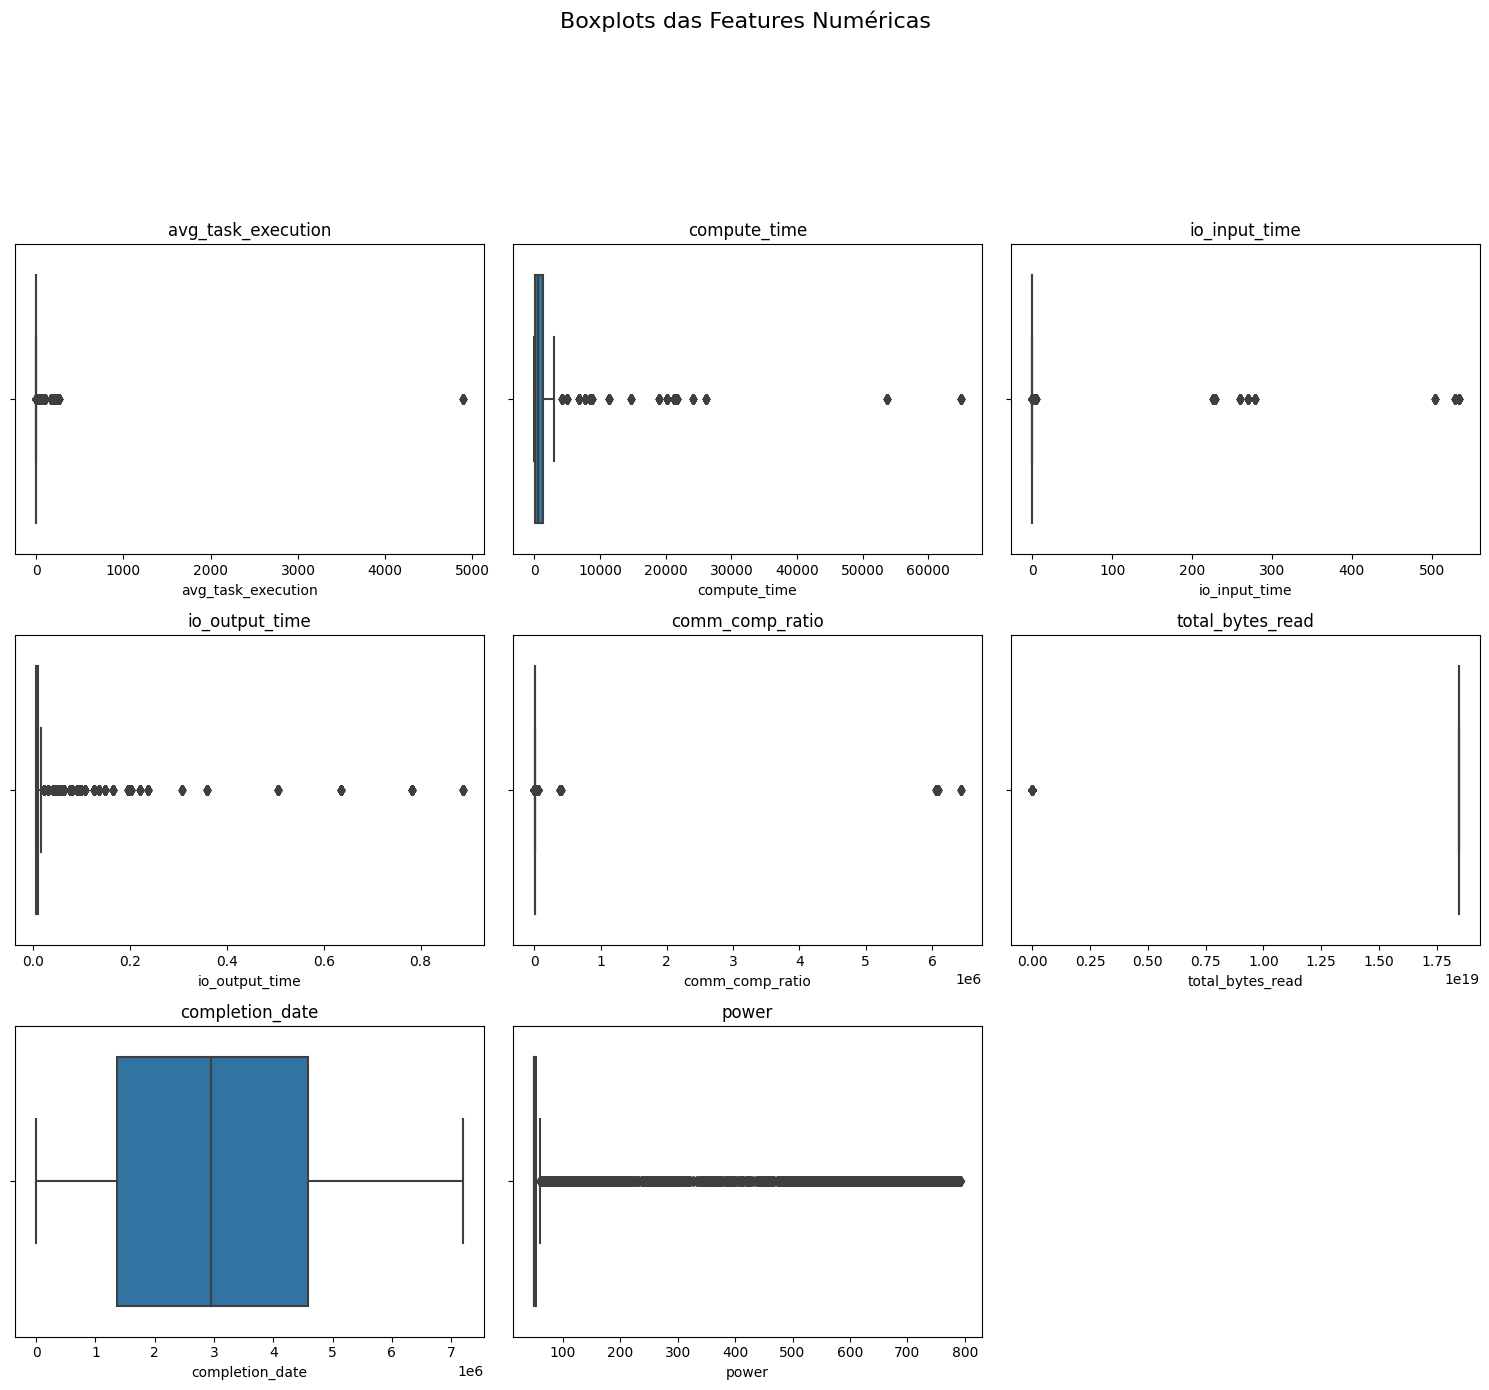

In [102]:
new_cols_features = df_numeric_types.drop(columns = ['num_of_cores', 'num_of_tasks', 'tasks_failed', 'total_bytes_write'])
columns_to_plot = new_cols_features.columns

num_features = len(columns_to_plot)

ncols_grid = min(num_features, 3)
nrows_grid = (num_features + ncols_grid - 1)

fig, axes = plt.subplots(nrows = nrows_grid, ncols = ncols_grid, figsize = (ncols_grid * 5, nrows_grid * 4))
fig.suptitle('Boxplots das Features Numéricas', fontsize=16, y=1.02)

if num_features == 1:
    axes_list = [axes]
else:
    axes_list = axes.flatten()
    
# Iterar sobre cada coluna e criar um boxplot em seu respectivo subplot
for i, col_name in enumerate(columns_to_plot):
    current_ax = axes_list[i]
    sns.boxplot(data=new_cols_features, x=col_name, ax=current_ax) # Cria boxplot horizontal para a coluna `col_name`
    current_ax.set_title(f'{col_name}')
    # current_ax.set_xlabel(col_name) # O nome da coluna já está no X por padrão com x=col_name
    # current_ax.set_ylabel('')      # Para boxplots horizontais, o eixo Y não tem um significado direto

# Ocultar eixos não utilizados (se o número de features não preencher a grade perfeitamente)
for j in range(num_features, len(axes_list)):
    fig.delaxes(axes_list[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout para evitar sobreposições e dar espaço ao suptitle
plt.show()

    

## Feature Engineering

In [103]:
count = 1
for index in df.index:
    selected_index = df[df['run_id'].str.contains(r'^extk', regex=True)].head(36).index
    df.loc[selected_index, 'run_id'] = 'simu-' + str(count)
    count += 1

In [104]:
# agregando os dados por run_id
agg_df = df.groupby("run_id").agg({
    "host_name": "first",             # Nome do host (primeiro encontrado para o run_id)
    "num_of_cores": "sum",            # Total de núcleos usados na execução
    "cores_allocated_task": "sum",    # Soma dos núcleos alocados por tarefa
    "num_of_tasks": "first",          # Número de tarefas (mesmo valor para todas as entradas do run_id)
    "avg_task_execution": "first",    # Média de execução da tarefa (primeiro valor encontrado para o run_id)
    "tasks_failed": "sum",            # Total de tarefas falhas
    "compute_time": "mean",           # Tempo médio de computação
    "io_input_time": "sum",           # Tempo total de E/S de entrada
    "io_output_time": "sum",          # Tempo total de E/S de saída
    "comm_comp_ratio": "mean",        # Razão média entre comunicação e computação
    "total_bytes_read": "first",      # Total de bytes lidos (primeiro valor encontrado para o run_id)
    "total_bytes_write": "first",     # Total de bytes escritos (primeiro valor encontrado para o run_id)
    "power": 'sum',                   # Consumo total de energia
    "completion_date": "first"        # Data de conclusão (mesma para todas as entradas do run_id)
}).reset_index()

In [105]:
agg_df['cores_allocated_task'] = agg_df['cores_allocated_task'].str.split(';').apply(lambda x: [int(val) for val in x])
agg_df['sum_cores_allocated'] = agg_df['cores_allocated_task'].apply(sum)

In [106]:
df_numeric_types_agg = agg_df.select_dtypes(include = np.number)
df_numeric_types_agg

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,1008,98,8.971430,0,879.2,0.237919,0.436025,553.686,18446744073709551518,18446744073709551518,4468.7935,200560.0,3843
1,1008,10068,0.134394,6048,1330.5,0.239558,0.254554,4579.210,18446744073709541548,18446744073709541548,8436.6297,5186390.0,362763
2,1008,10888,0.015569,6048,166.9,0.237389,0.330055,4585.120,18446744073709540728,18446744073709540728,8436.2327,5584880.0,392283
3,1008,6378,0.056381,0,359.6,0.239324,0.436327,4511.130,18446744073709545238,18446744073709545238,8364.6244,3281730.0,229923
4,1008,6388,0.116202,0,742.3,0.234827,0.254554,4562.040,18446744073709545228,18446744073709545228,8339.7224,3301460.0,230283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,1008,6328,0.138417,0,875.9,0.239869,0.318656,4584.250,18446744073709545288,18446744073709545288,8338.9044,3246470.0,228123
2545,1008,6338,0.263332,0,1669.0,0.235370,0.280760,4540.610,18446744073709545278,18446744073709545278,8351.3384,3294490.0,228483
2546,1008,6348,0.075142,0,477.0,0.234827,0.254554,4492.770,18446744073709545268,18446744073709545268,8370.4554,3272030.0,228843
2547,1008,6358,0.026250,0,166.9,0.237254,0.394052,4518.900,18446744073709545258,18446744073709545258,8351.3494,3278400.0,229203


# Pre-Processing

## avg_task_execution

In [107]:
Q1_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.25)
Q3_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.75)

IQR = Q3_avg_task_execution - Q1_avg_task_execution
lower_limit = Q1_avg_task_execution - 1.5 * IQR
upper_limit = Q3_avg_task_execution + 1.5 * IQR

In [108]:
outlier_condition = (df_numeric_types_agg['avg_task_execution'] < lower_limit) | (df_numeric_types_agg['avg_task_execution'] > upper_limit)

In [109]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'avg_task_execution']
mean_replacement = no_outliers_values.mean()

In [110]:
df_numeric_types_agg_treated = df_numeric_types_agg.copy()
df_numeric_types_agg_treated.loc[outlier_condition, 'avg_task_execution'] = mean_replacement

<Axes: xlabel='avg_task_execution'>

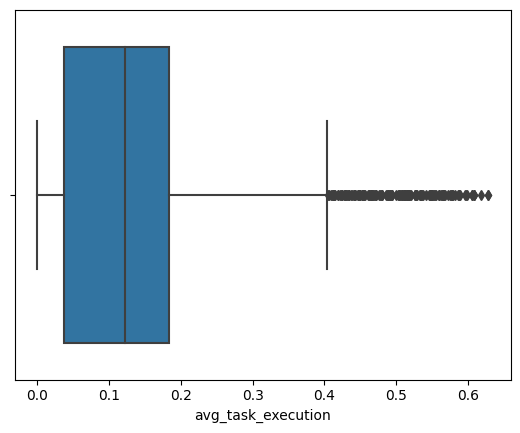

In [111]:
sns.boxplot(data = df_numeric_types_agg_treated, x = 'avg_task_execution')

## comm_comp_ratio

In [112]:
Q1_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.25)
Q3_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.75)

IQR = Q3_comm_comp_ratio - Q1_comm_comp_ratio
lower_limit = Q1_comm_comp_ratio - 1.5 * IQR
upper_limit = Q3_comm_comp_ratio + 1.5 * IQR

In [113]:
outlier_condition = (df_numeric_types_agg['comm_comp_ratio'] < lower_limit) | (df_numeric_types_agg['comm_comp_ratio'] > upper_limit)

In [114]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'comm_comp_ratio']
mean_replacement = no_outliers_values.mean()

In [115]:
df_numeric_types_agg_treated.loc[outlier_condition, 'comm_comp_ratio'] = mean_replacement

<Axes: xlabel='comm_comp_ratio'>

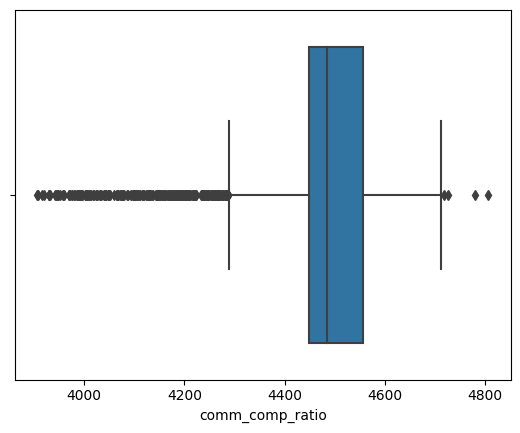

In [116]:
sns.boxplot(data = df_numeric_types_agg_treated, x = 'comm_comp_ratio')

In [117]:
df_numeric_types_agg_treated['power'] = df_numeric_types_agg_treated.loc[:, 'power'].apply(np.log10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='power', ylabel='Count'>

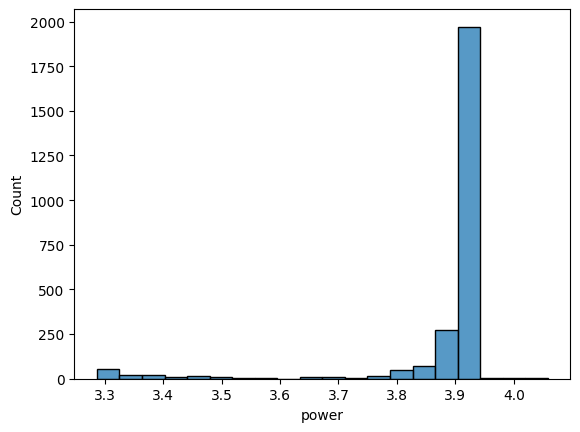

In [118]:
sns.histplot(data = df_numeric_types_agg_treated, x = 'power', bins=20)

In [119]:
df_numeric_types_agg_treated['completion_date'] = df_numeric_types_agg_treated.loc[:, 'completion_date'].apply(np.log10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='completion_date', ylabel='Count'>

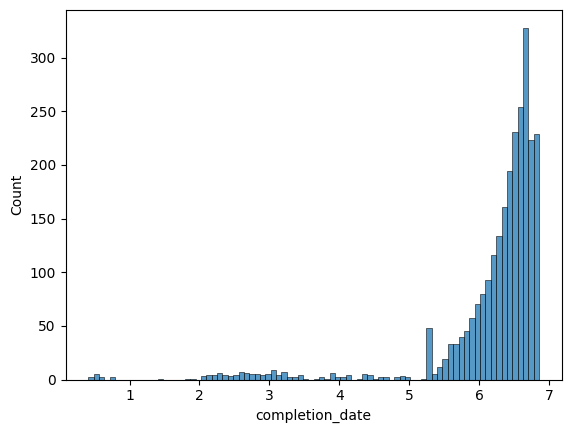

In [120]:
sns.histplot(data = df_numeric_types_agg_treated, x = 'completion_date')

# Machine Learning

In [121]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [122]:
df_numeric_types_agg_treated.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'power', 'completion_date',
       'sum_cores_allocated'],
      dtype='object')

In [123]:
df3 = df_numeric_types_agg_treated.drop(columns=['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed'], axis=1)
df3

,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,879.2,0.237919,0.436025,4472.032042,18446744073709551518,18446744073709551518,3.650190,5.302244,3843
1,1330.5,0.239558,0.254554,4579.210000,18446744073709541548,18446744073709541548,3.926169,6.714865,362763
2,166.9,0.237389,0.330055,4585.120000,18446744073709540728,18446744073709540728,3.926149,6.747014,392283
3,359.6,0.239324,0.436327,4511.130000,18446744073709545238,18446744073709545238,3.922446,6.516103,229923
4,742.3,0.234827,0.254554,4562.040000,18446744073709545228,18446744073709545228,3.921152,6.518706,230283
...,...,...,...,...,...,...,...,...,...
2544,875.9,0.239869,0.318656,4584.250000,18446744073709545288,18446744073709545288,3.921109,6.511411,228123
2545,1669.0,0.235370,0.280760,4540.610000,18446744073709545278,18446744073709545278,3.921756,6.517788,228483
2546,477.0,0.234827,0.254554,4492.770000,18446744073709545268,18446744073709545268,3.922749,6.514817,228843
2547,166.9,0.237254,0.394052,4518.900000,18446744073709545258,18446744073709545258,3.921757,6.515662,229203


In [124]:
features = ['total_bytes_read', 'total_bytes_write',  'io_input_time',    'io_output_time']

## Performance

In [ ]:
target = 'completion_date'

### Gradient Boosting Regressor

(MAPE) on test set: 0.0578


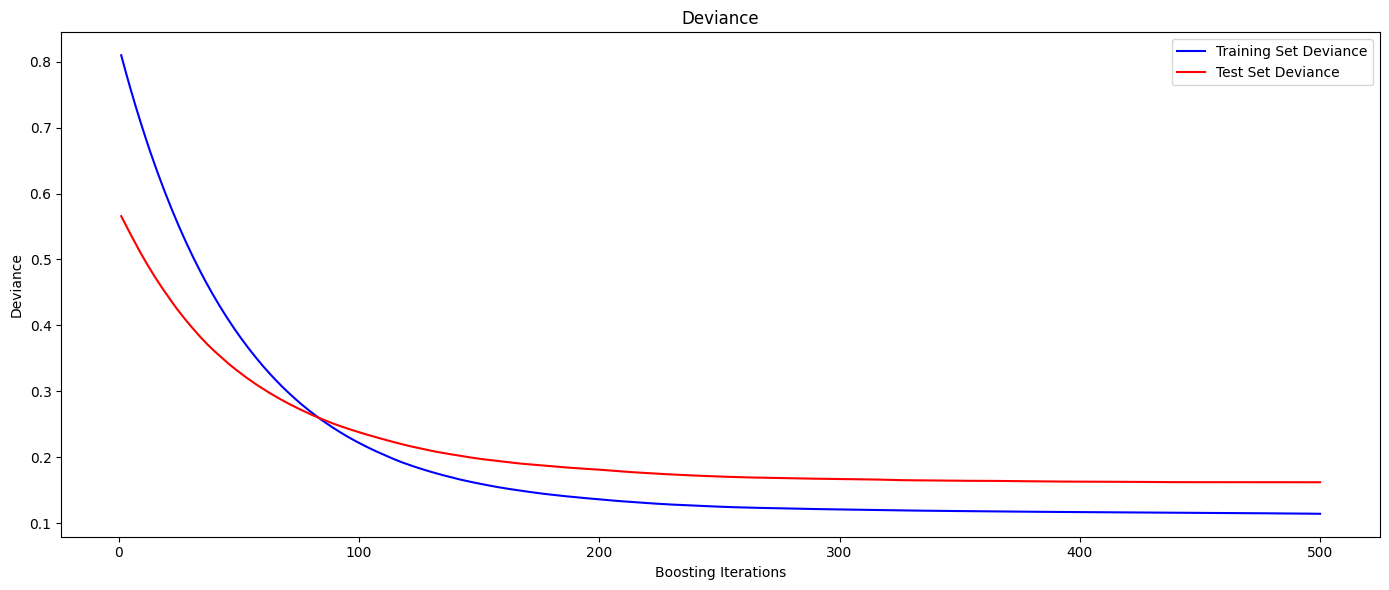

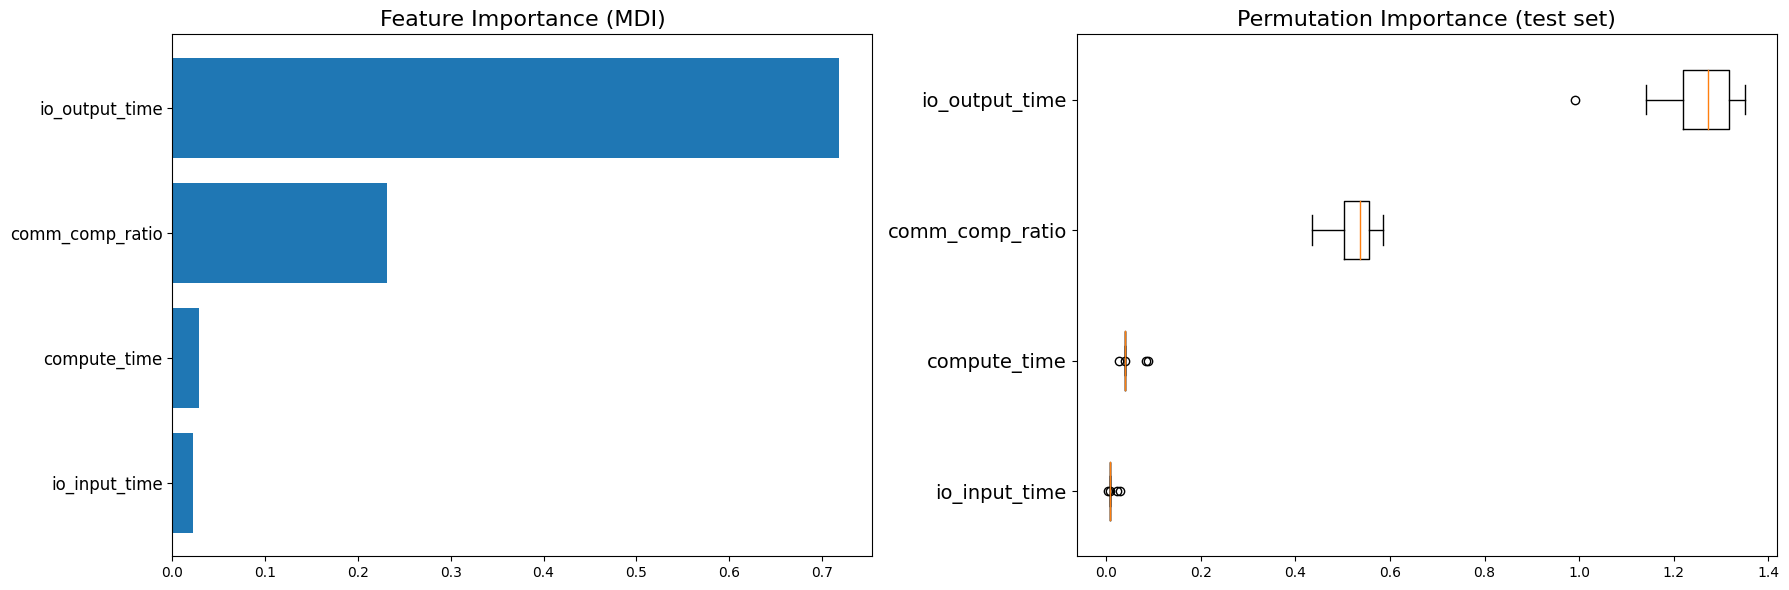

In [137]:

from sklearn import datasets, ensemble

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
print("(MAPE) on test set: {:.4f}".format(erro))



test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df3.columns)[sorted_idx], fontsize=12)
plt.title("Feature Importance (MDI)", fontsize=16)

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)

# `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
# renamed to `tick_labels`. The following code handles this, but as a
# scikit-learn user you probably can write simpler code by using `labels=...`
# (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(df3.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)", fontsize=16)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()

### Linear Regressor

Coeficientes da Regressão Linear: [-3.46226170e-12  3.46226179e-12 -1.34761257e-04 -2.85211561e-12]
Intercepto da Regressão Linear: 4.4999
Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.1103
Mean Squared Error (MSE) no conjunto de teste: 0.4391


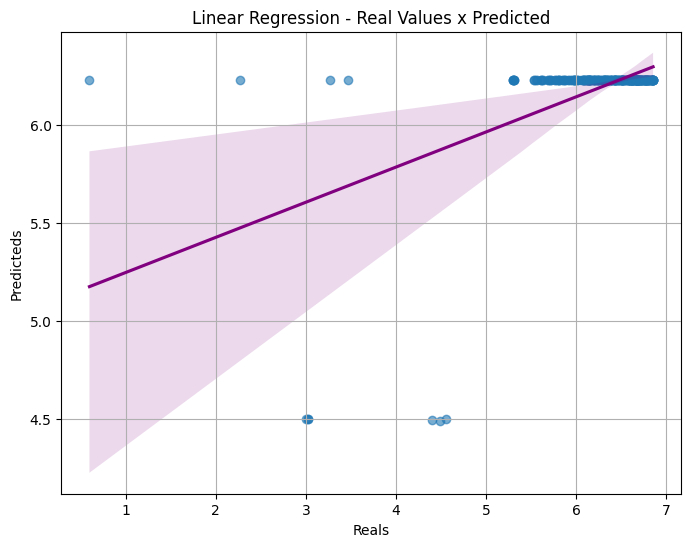

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Coeficientes da Regressão Linear: {reg.coef_}")
print(f"Intercepto da Regressão Linear: {reg.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Linear Regression - Real Values x Predicted')
plt.grid(True)
plt.show()

### Random Forest

Importância das Features (Random Forest):
  total_bytes_read: 0.0212
  total_bytes_write: 0.0231
  io_input_time: 0.6947
  io_output_time: 0.2610

Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0581
Mean Squared Error (MSE) no conjunto de teste: 0.1969


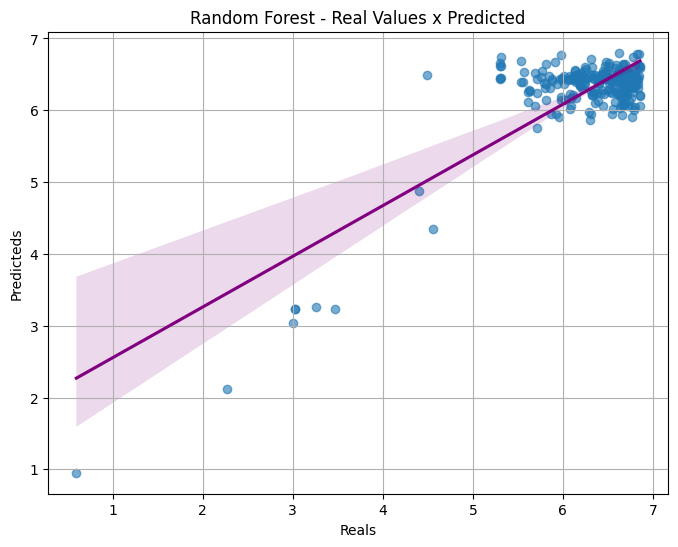

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)

reg = RandomForestRegressor(n_estimators=500, random_state=12)
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Importância das Features (Random Forest):")
for feature, importance in zip(features, reg.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Random Forest - Real Values x Predicted')
plt.grid(True)
plt.show()

## Energy

In [141]:
target2 = 'power'

### Gradient Boosting Regressor

(MAPE) on test set: 0.0067


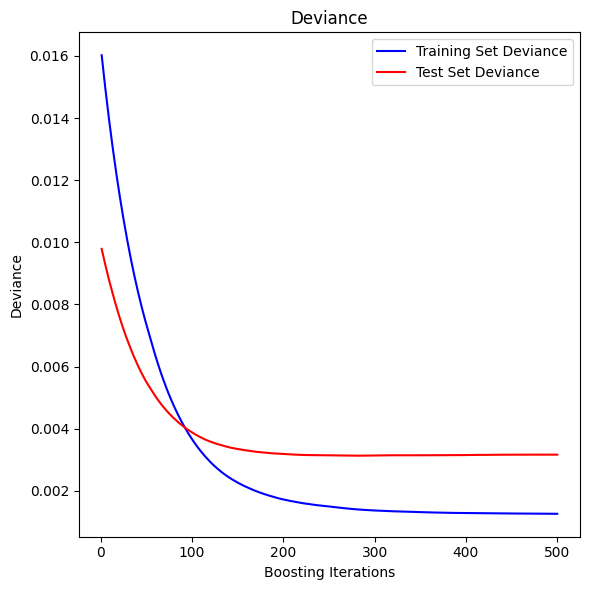

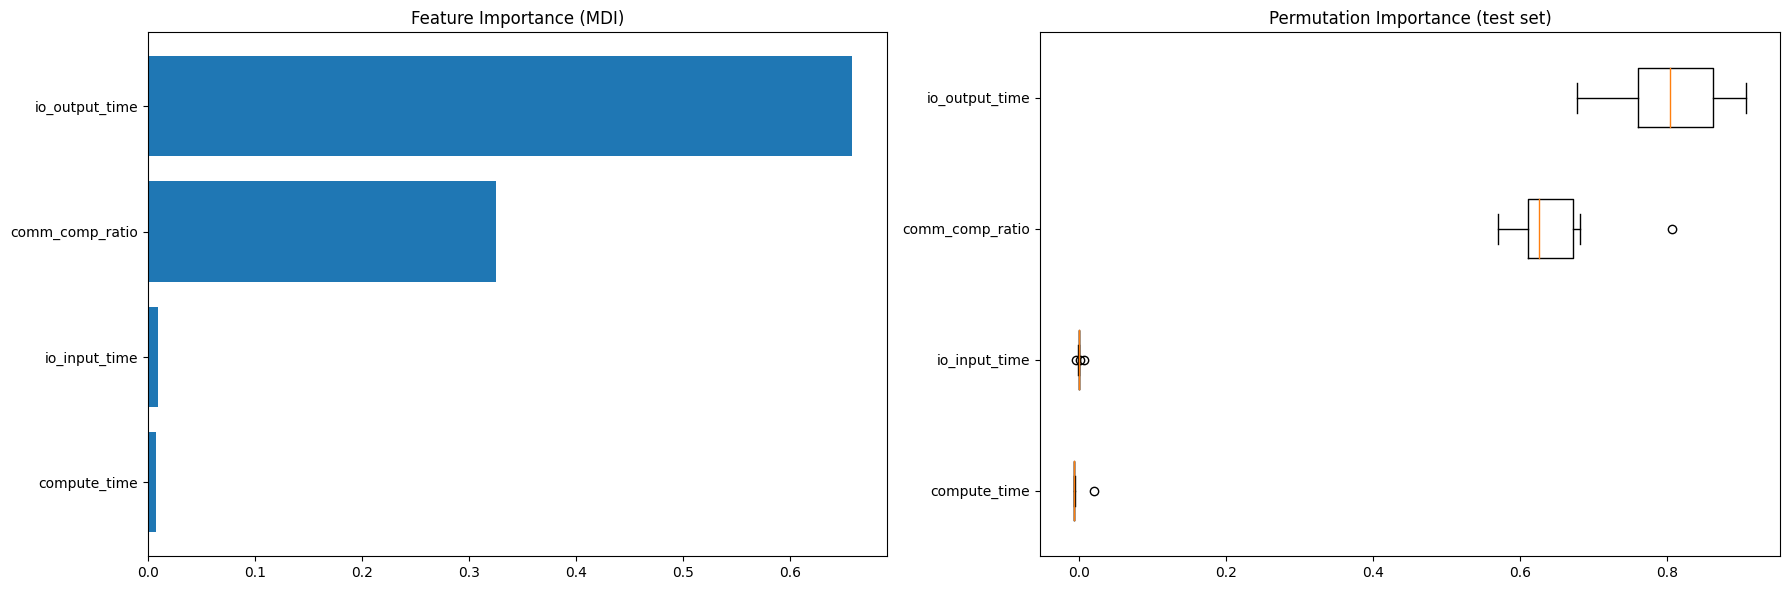

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
print("(MAPE) on test set: {:.4f}".format(erro))



test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df4.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)

# `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
# renamed to `tick_labels`. The following code handles this, but as a
# scikit-learn user you probably can write simpler code by using `labels=...`
# (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(df4.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Coeficientes da Regressão Linear: [-2.46124204e-12  2.46124206e-12 -4.06878041e-05 -8.61125248e-13]
Intercepto da Regressão Linear: 3.4854
Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0110
Mean Squared Error (MSE) no conjunto de teste: 0.0055


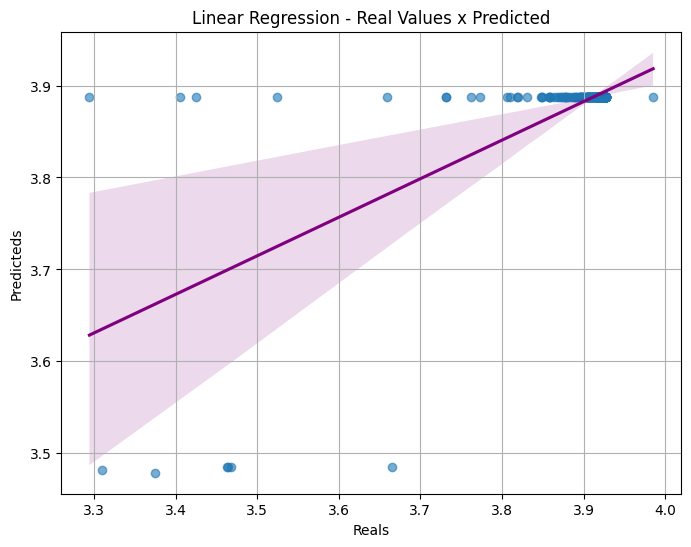

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Coeficientes da Regressão Linear: {reg.coef_}")
print(f"Intercepto da Regressão Linear: {reg.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Linear Regression - Real Values x Predicted')
plt.grid(True)
plt.show()

Importância das Features (Random Forest):
  total_bytes_read: 0.0105
  total_bytes_write: 0.0063
  io_input_time: 0.6512
  io_output_time: 0.3319

Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0076
Mean Squared Error (MSE) no conjunto de teste: 0.0038


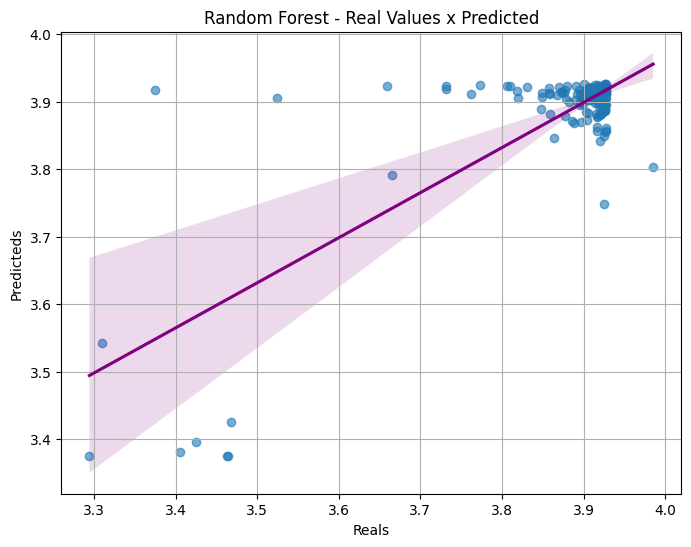

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)

reg = RandomForestRegressor(n_estimators=500, random_state=12)
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Importância das Features (Random Forest):")
for feature, importance in zip(features, reg.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Random Forest - Real Values x Predicted')
plt.grid(True)
plt.show()